In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [94]:
from skimage.io import imread, imshow
from skimage import img_as_float
from skimage.color import rgb2grey
from skimage.transform import resize
from skimage.segmentation import (random_walker, felzenszwalb, 
                                  slic, quickshift, clear_border,
                                  find_boundaries, mark_boundaries, 
                                  watershed, chan_vese, morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set, circle_level_set)

In [95]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
e16_5 = 'data/2015-003-026_20X_C57Bl6_E16.5_LMM.14.24.4.41_CSPG4_NKX2.1_ACTA2_001.tif'
p07 = '2015-004-022_20X_C57BL6_PND7_LMM.15.23A.4L.39_ARL13B_EMCN_ACTA2_001.tif'
e18 = 'data/2015-001-029_20X_C57Bl6_LMM.14.49.5.84_ARL13B_NKX2.1_ACTA2_004.tif'
p01 = 'data/2016-02-16_20X_C57BL6_PND01_LMM.15.69A.5.50_ARL13B_NKX2.1_ACTA2_001.tif'
p28 = 'data/2015-004-022_20X_C57BL6_PND28_LMM.15.24A.6L.32_ARL13B_EMCN_ACTA2_002.tif'
orig_img = imread(p28)

In [97]:
orig_img = img_as_float(orig_img)

In [98]:
orig_img.shape

(2475, 2475, 3)

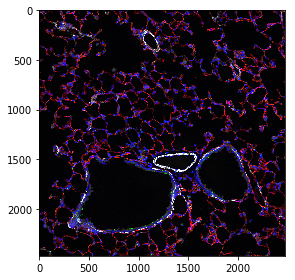

In [186]:
imshow(orig_img)
pass

## Detail

In [99]:
w = 256
h = 256

img = orig_img[:w, :h, :]

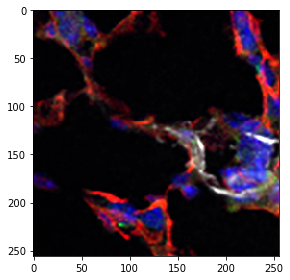

In [100]:
imshow(img)
pass

In [101]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

In [102]:
list(map(np.median, [red, green, blue]))

[0.00784313725490196, 0.00784313725490196, 0.0196078431372549]

In [103]:
t1 = (red < np.median(red)) 
t1 &= (green < np.median(green)) 
t1 &= (blue < np.median(blue))
t2 = red > np.percentile(red, 0.9)
t3 = green > np.percentile(green, 0.9)
t4 = blue > np.percentile(blue, 0.9)

### Random walker

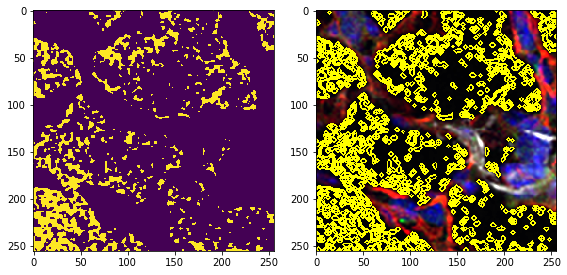

In [104]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

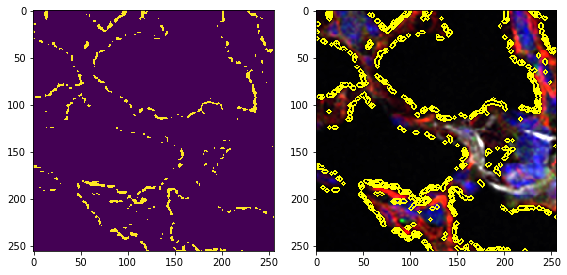

In [105]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t2] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

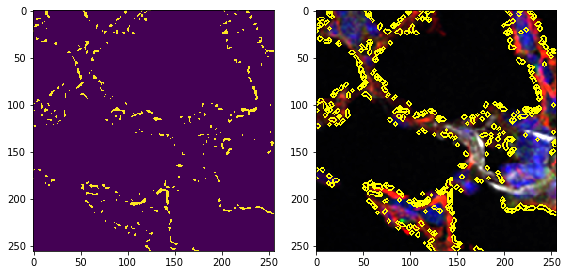

In [106]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t3] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

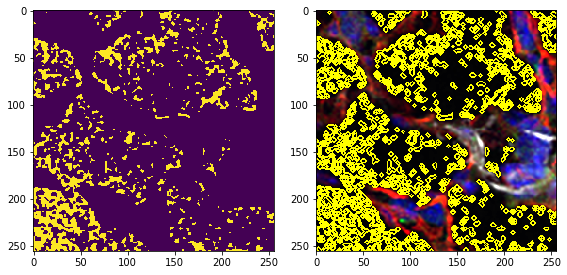

In [107]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t3] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

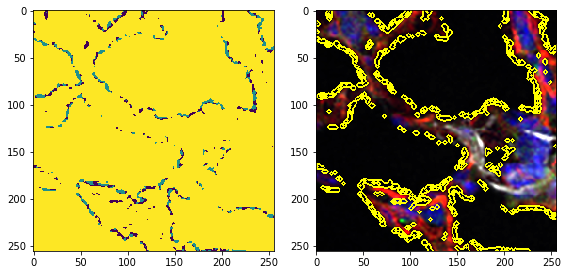

In [108]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
labels[t2] = 3
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Watershed

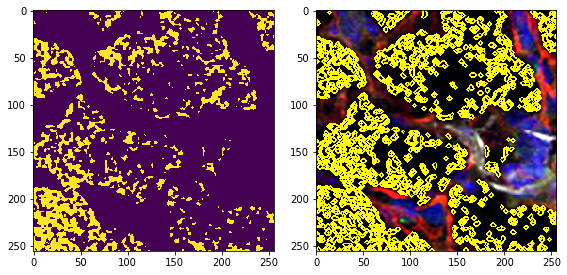

In [109]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

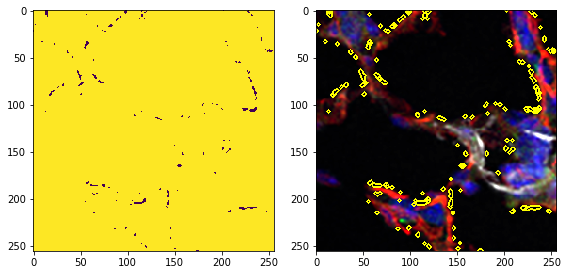

In [110]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

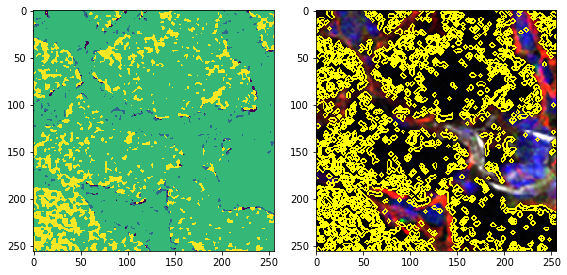

In [111]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 3
labels[t1] = 4
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### felzenszwalb

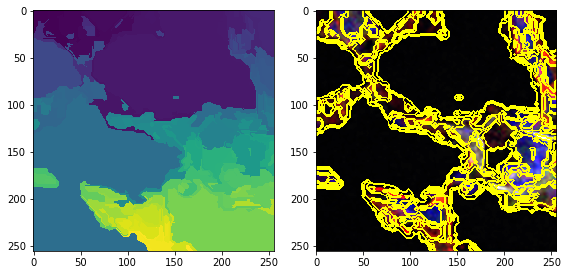

In [112]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 100
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

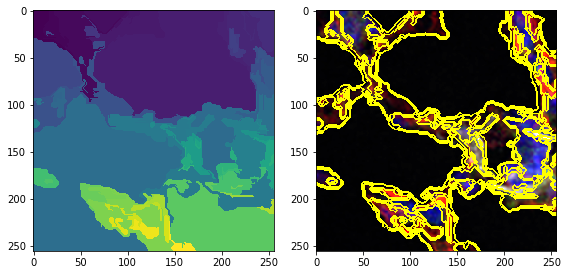

In [113]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 200
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

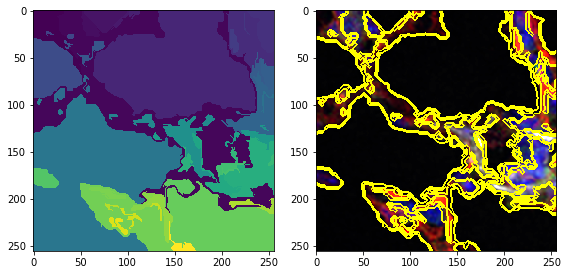

In [114]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 300
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

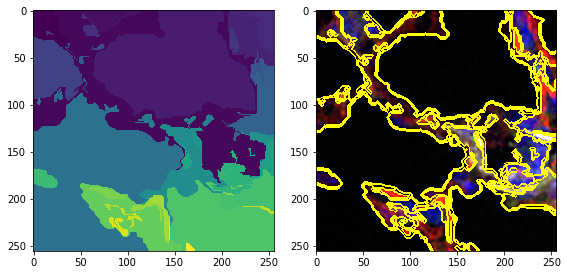

In [115]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 400
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

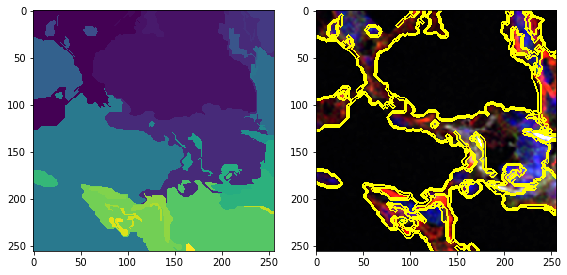

In [116]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 500
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

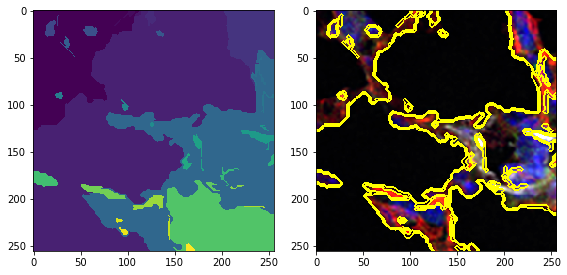

In [117]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 1000
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### SLIC

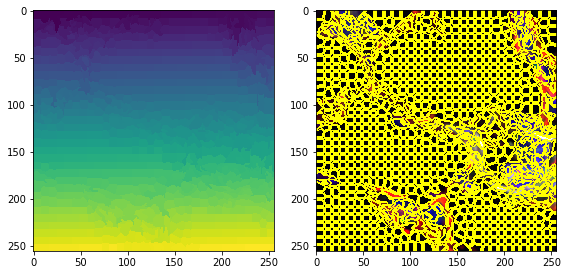

In [118]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 10
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

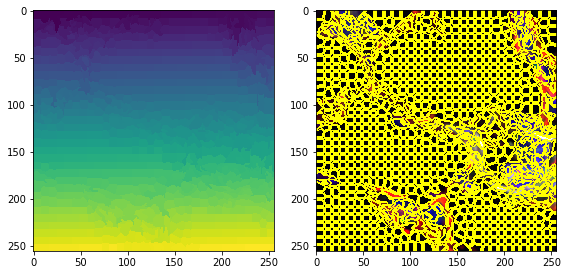

In [119]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 50
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

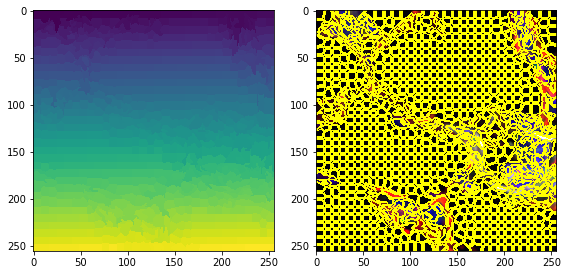

In [120]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 100
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

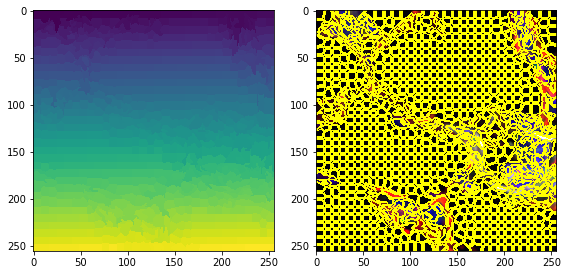

In [121]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 200
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

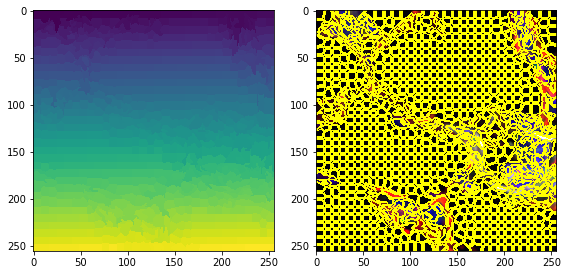

In [122]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 500
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

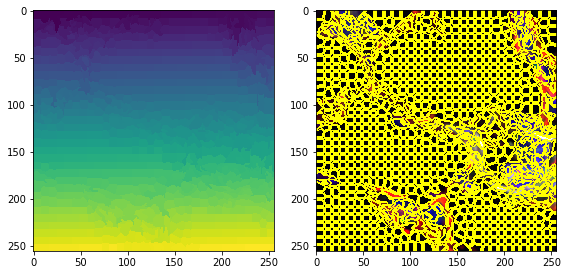

In [123]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 1000
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Qucikshift

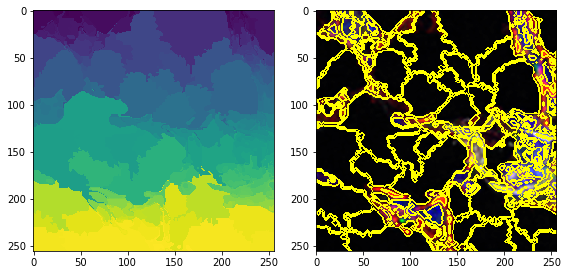

In [124]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
bndc = clear_border(bnd)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

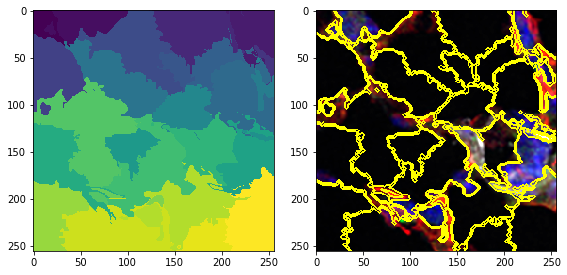

In [125]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

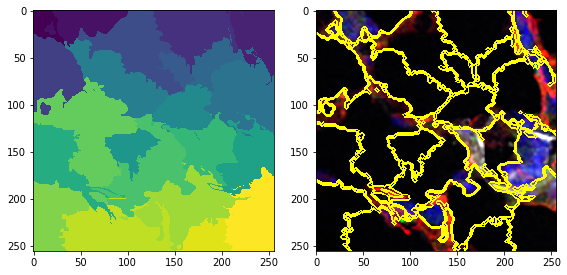

In [126]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 1000
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')

imshow(img2)
pass

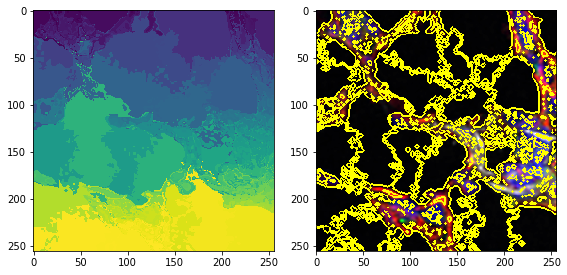

In [127]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 10
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

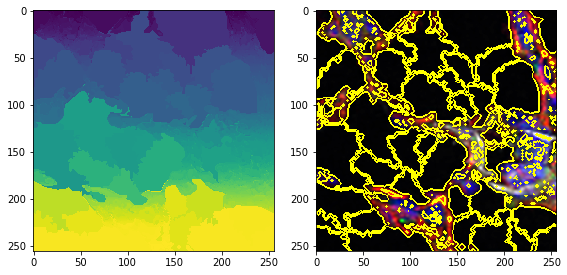

In [128]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 2
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Chan-vese

In [129]:
gimg = rgb2grey(img)

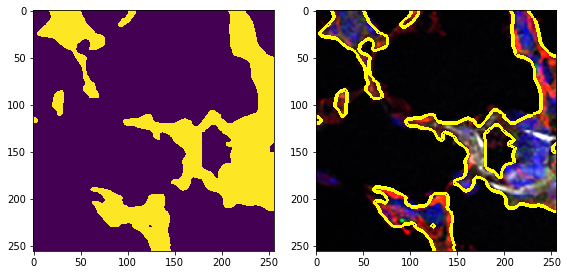

In [130]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.1
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

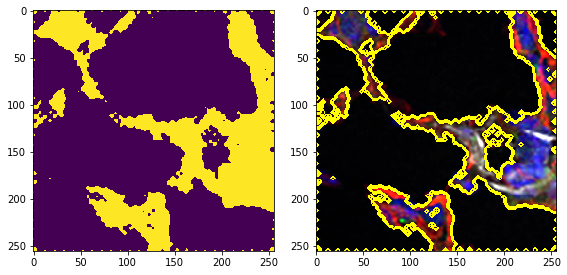

In [131]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

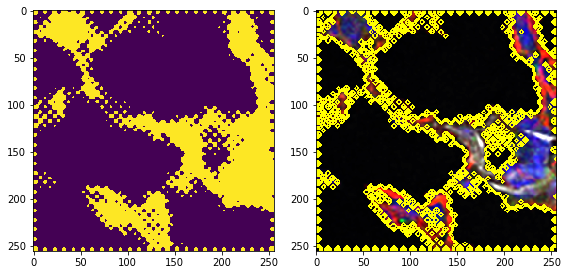

In [132]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.5
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

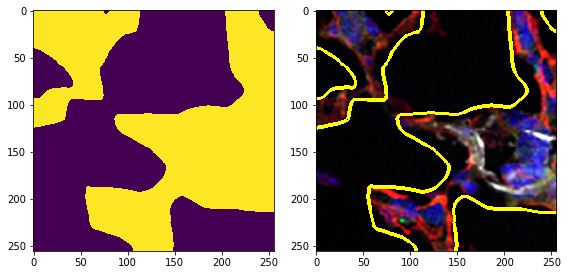

In [133]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.0
lambda2=2.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

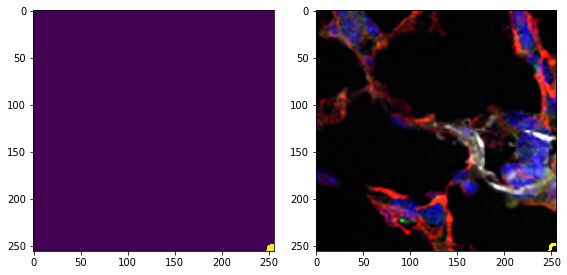

In [134]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=2.0
lambda2=1.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological chan vese

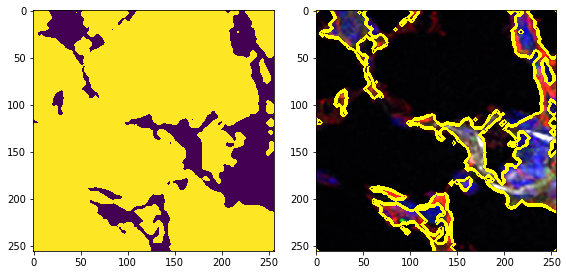

In [135]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=1
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

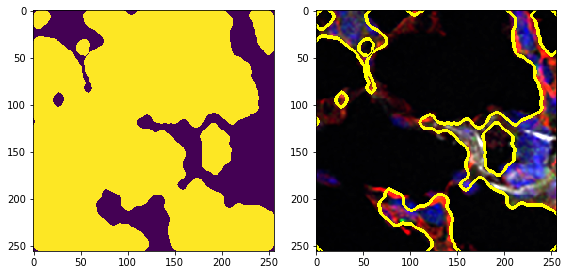

In [136]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

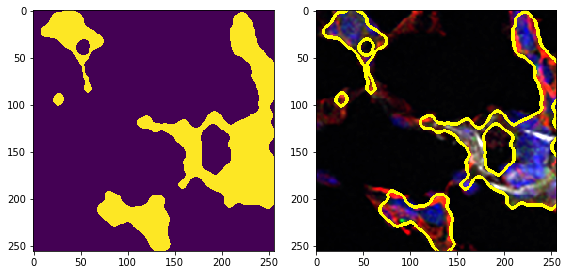

In [137]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=2)

segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

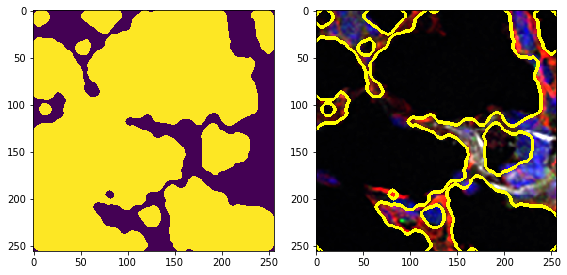

In [138]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,0], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

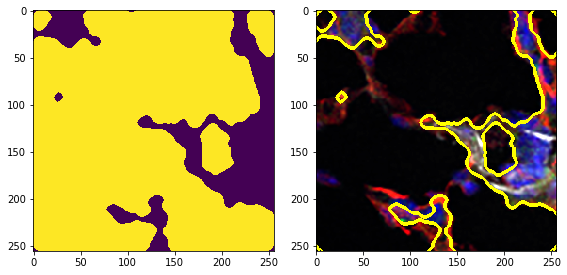

In [139]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,1], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

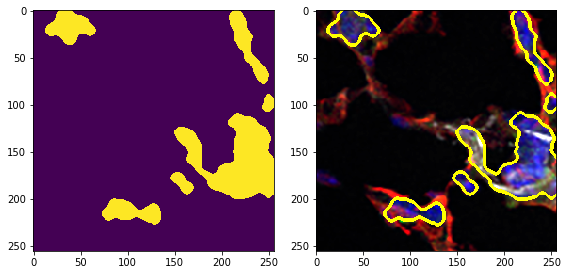

In [140]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,2], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological_geodesic_active_contour

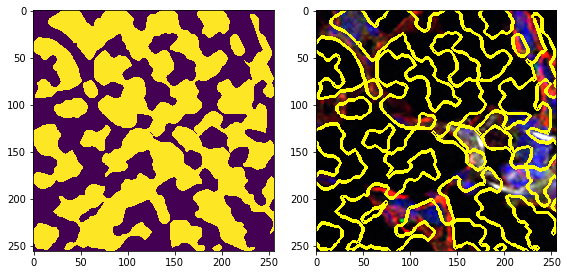

In [141]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

alpha=100.0
sigma=5.0
gimage = inverse_gaussian_gradient(gimg)

smoothing=2
iterations=10

init_level_set=checkerboard_level_set(gimg.shape, square_size=25)

segments = morphological_geodesic_active_contour(
    gimage, iterations, init_level_set=init_level_set, smoothing=smoothing)

plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

## Global

In [142]:
w = 256
h = 256

img = resize(orig_img, (w, h, 3))

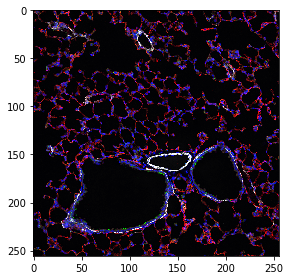

In [143]:
imshow(img)
pass

In [144]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

In [145]:
list(map(np.median, [red, green, blue]))

[0.008781971650963977, 0.00784313725490196, 0.019538909313725154]

In [146]:
t1 = (red < np.median(red)) 
t1 &= (green < np.median(green)) 
t1 &= (blue < np.median(blue))
t2 = red > np.percentile(red, 0.9)
t3 = green > np.percentile(green, 0.9)
t4 = blue > np.percentile(blue, 0.9)

### Random walker

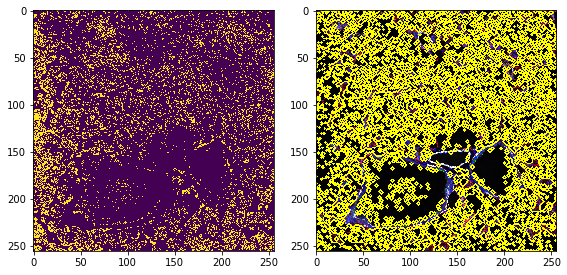

In [147]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

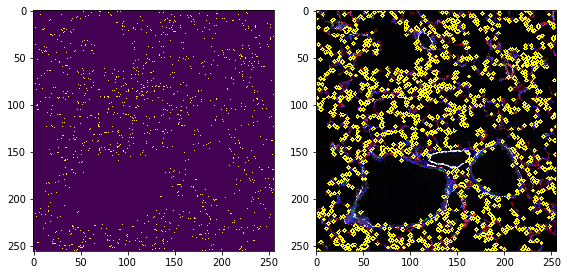

In [148]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t2] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

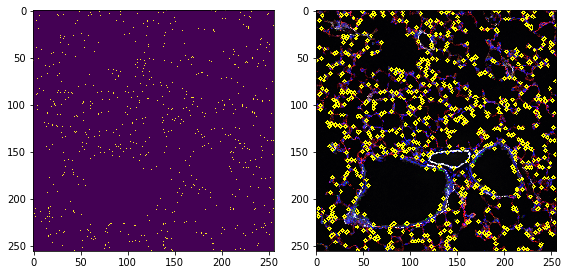

In [149]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t3] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

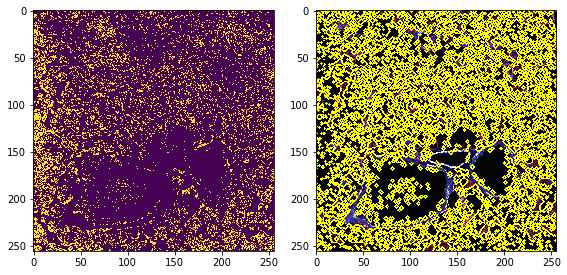

In [150]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t3] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

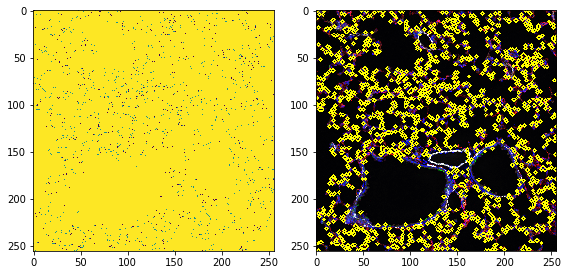

In [151]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
labels[t2] = 3
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Watershed

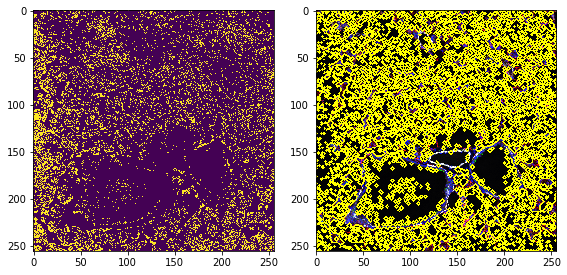

In [152]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

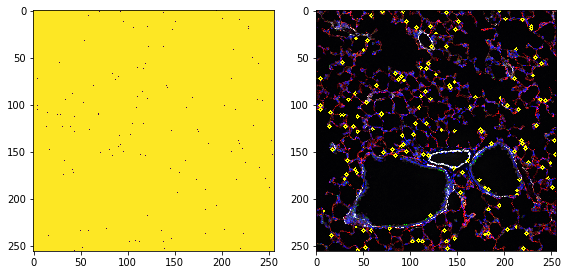

In [153]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

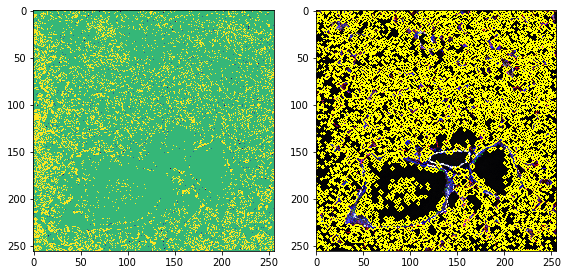

In [154]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 3
labels[t1] = 4
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### felzenszwalb

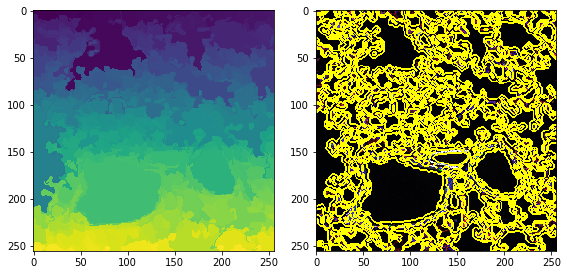

In [155]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 100
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

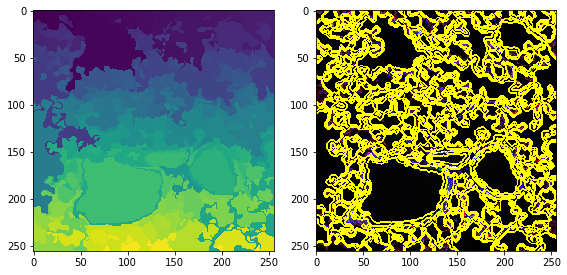

In [156]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 200
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

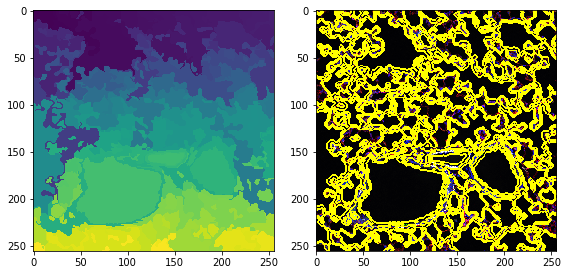

In [157]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 300
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

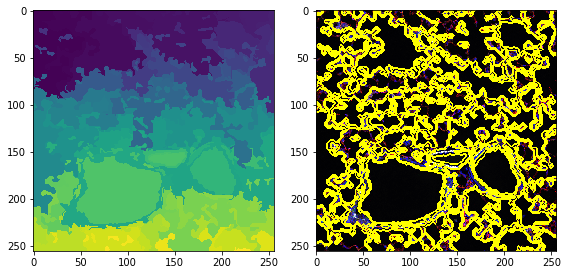

In [158]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 400
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

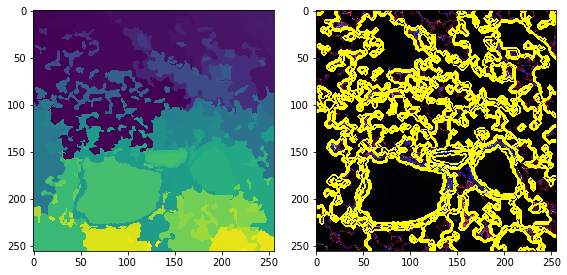

In [159]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 500
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

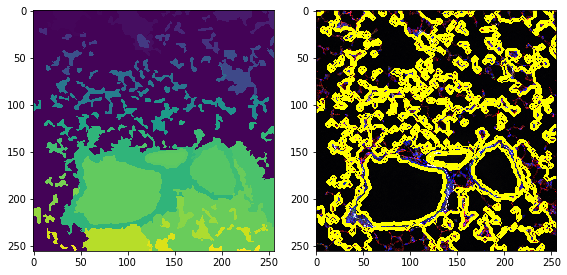

In [160]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 1000
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### SLIC

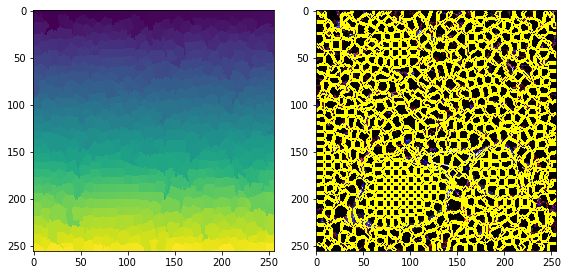

In [161]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 10
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

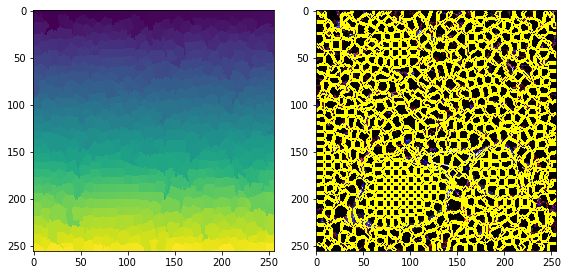

In [162]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 50
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

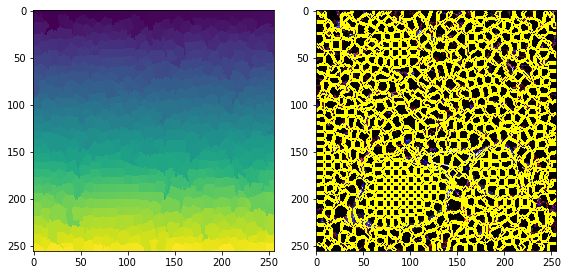

In [163]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 100
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

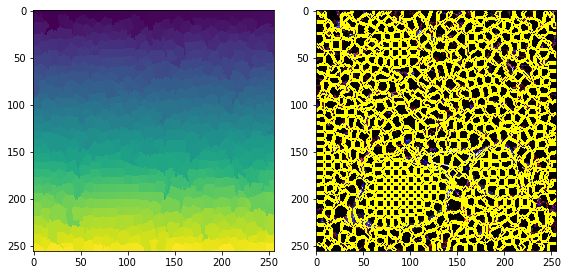

In [164]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 200
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

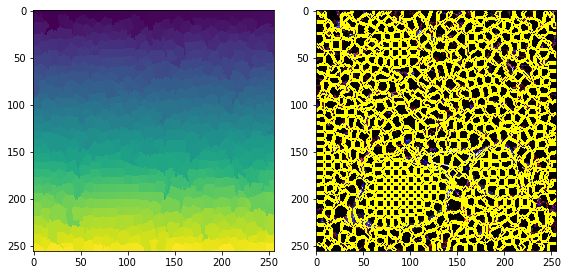

In [165]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 500
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

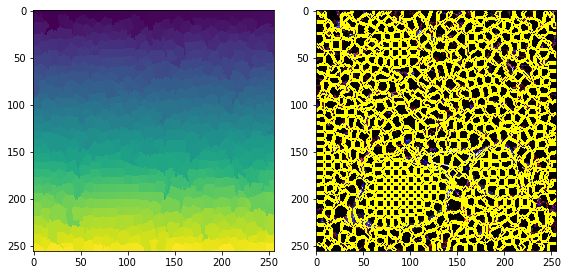

In [166]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 1000
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Qucikshift

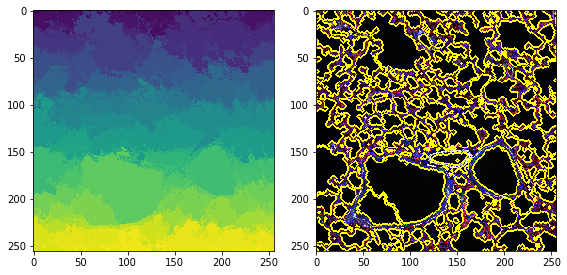

In [167]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
bndc = clear_border(bnd)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

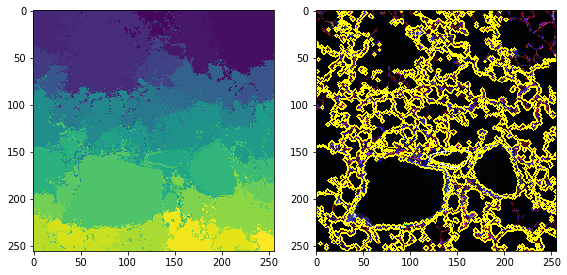

In [168]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

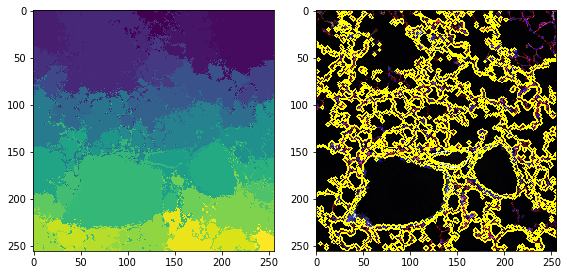

In [169]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 1000
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')

imshow(img2)
pass

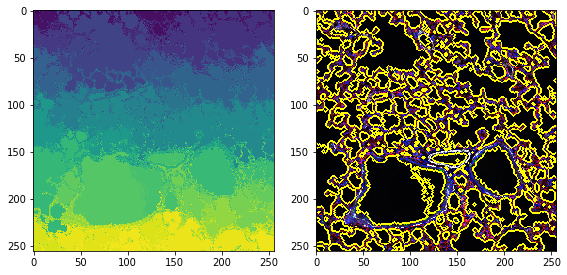

In [170]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 10
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

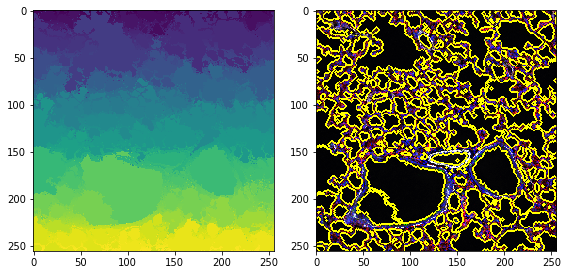

In [171]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 2
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Chan-vese

In [172]:
gimg = rgb2grey(img)

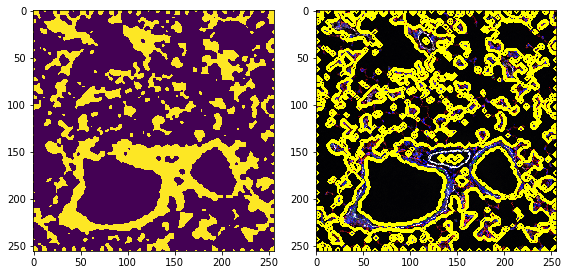

In [173]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.1
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

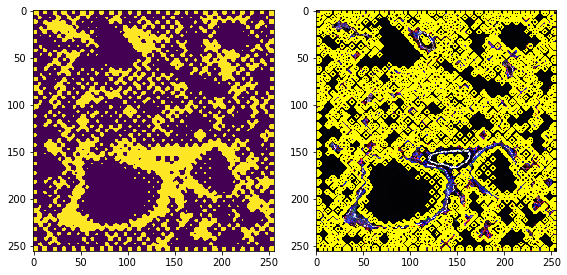

In [174]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

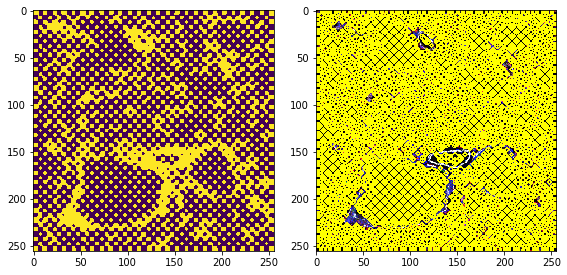

In [175]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.5
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

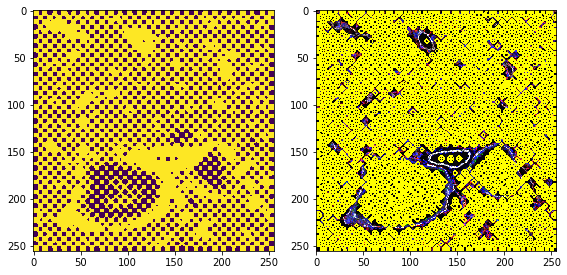

In [176]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.0
lambda2=1.25
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

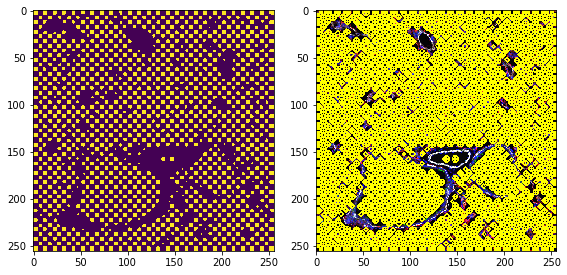

In [177]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.25
lambda2=1.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological chan vese

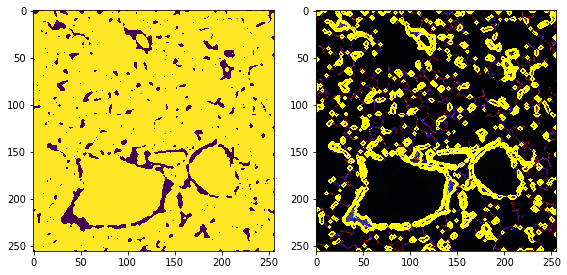

In [178]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=1
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

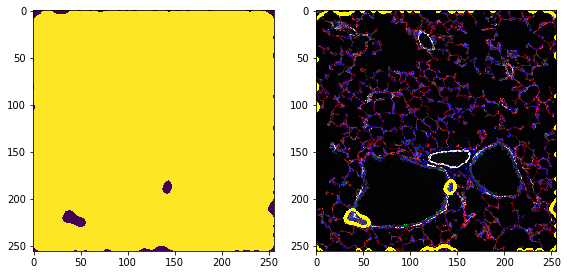

In [179]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

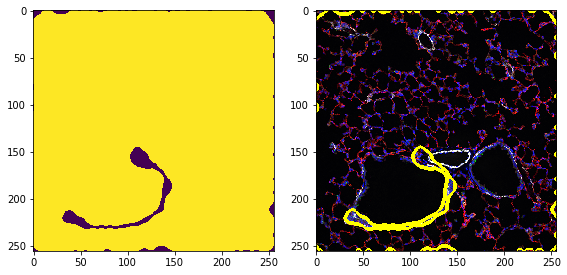

In [180]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=2)

segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

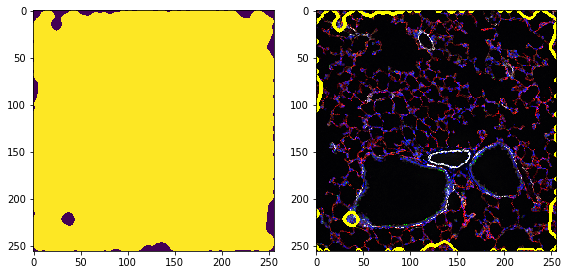

In [181]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,0], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

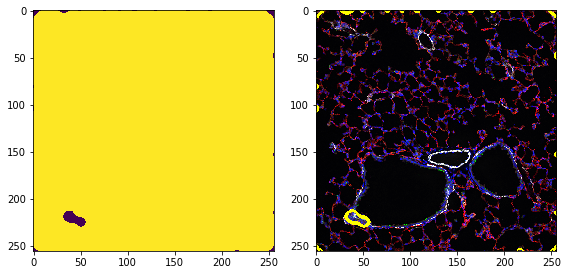

In [182]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,1], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

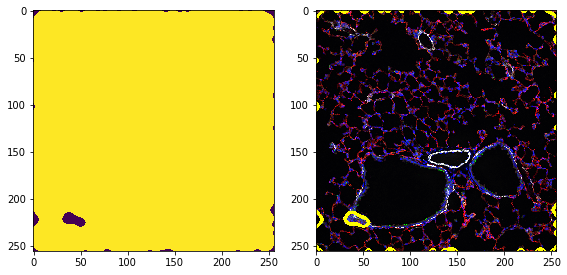

In [183]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,2], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological_geodesic_active_contour

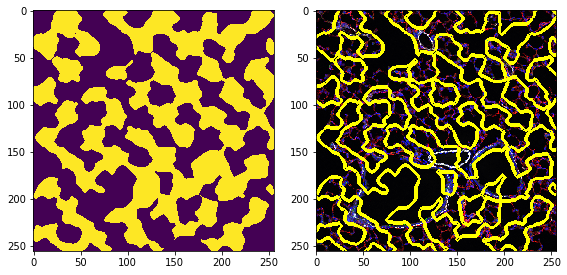

In [184]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

alpha=100.0
sigma=5.0
gimage = inverse_gaussian_gradient(gimg)

smoothing=2
iterations=10

init_level_set=checkerboard_level_set(gimg.shape, square_size=25)

segments = morphological_geodesic_active_contour(
    gimage, iterations, init_level_set=init_level_set, smoothing=smoothing)

plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass